In [1]:
import torch
import torchvision
from torchvision.utils import draw_bounding_boxes
import numpy as np
from PIL import Image

In [2]:
PATH_MODEL = 'entire_model.pt'

model = torch.load(PATH_MODEL)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [3]:
sample_image = Image.open('samples/output.png')
sample_image = np.expand_dims(np.array(sample_image), 0) / 255.0
sample_image = torch.from_numpy(sample_image).type(torch.FloatTensor).to(torch.device('cuda'))
sample_image.shape

torch.Size([1, 2452, 1839])

In [4]:
def visualize_bboxes(image, target, labels=None):
    sample_boxes = target['boxes']
    sample_scores = target['scores']
    boxes_sliced = sample_boxes[0:torch.max(torch.nonzero(sample_scores>0.5)),:]

    sample_image = (image*255).type(torch.ByteTensor)

    sample_im_with_bounding_boxes = draw_bounding_boxes(sample_image, boxes_sliced, labels, colors='red', width=3)

    return Image.fromarray(np.moveaxis(sample_im_with_bounding_boxes.numpy(), 0, -1))


In [5]:
images = []
images.append(sample_image)
detections = model(images)


In [6]:
image_with_bb = visualize_bboxes(images[0], detections[0])

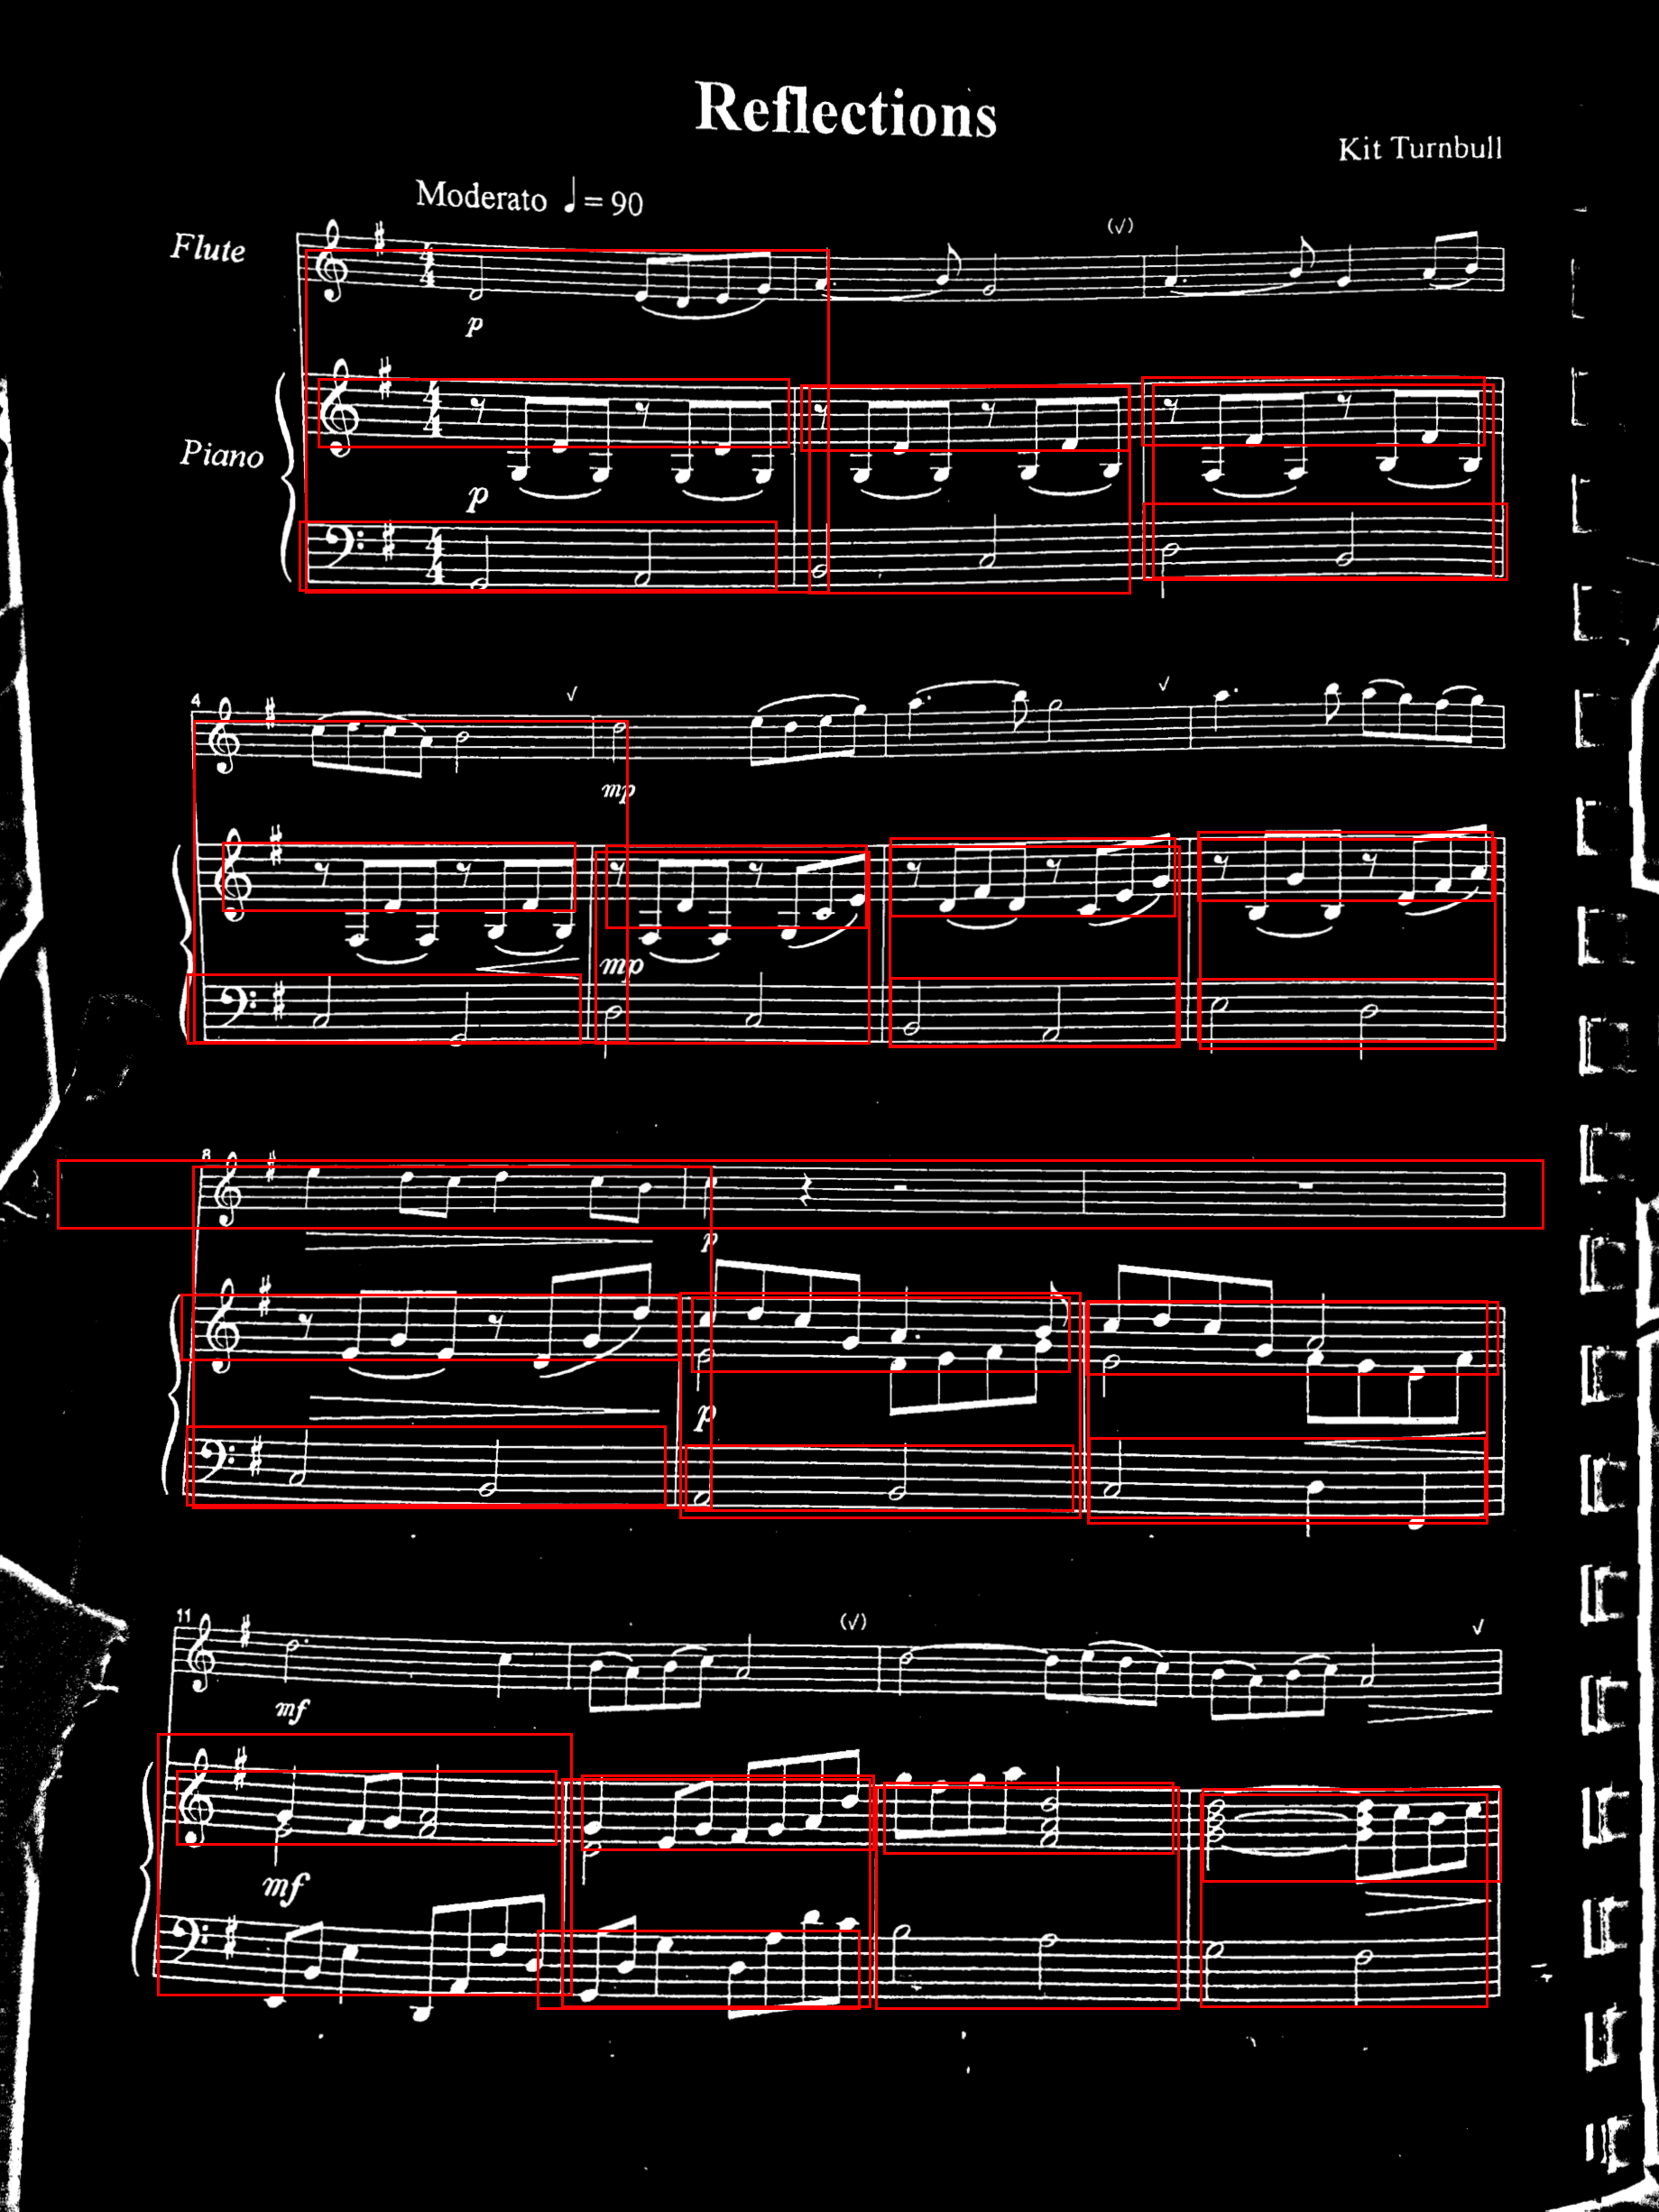

In [7]:
image_with_bb

In [37]:
image_with_bb.save('system_measures_test.png')